In [5]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
# import fashion mnist data
# import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import fashion_mnist

(20, 1) (20,)


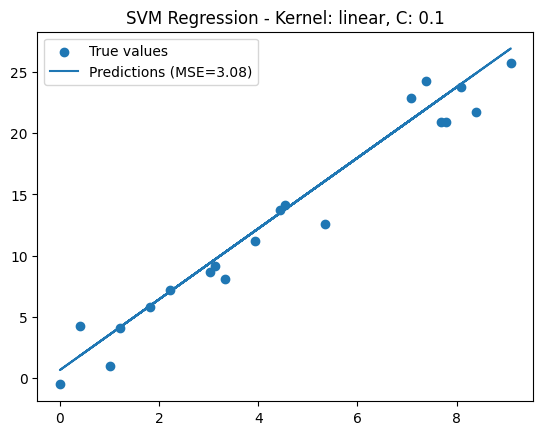

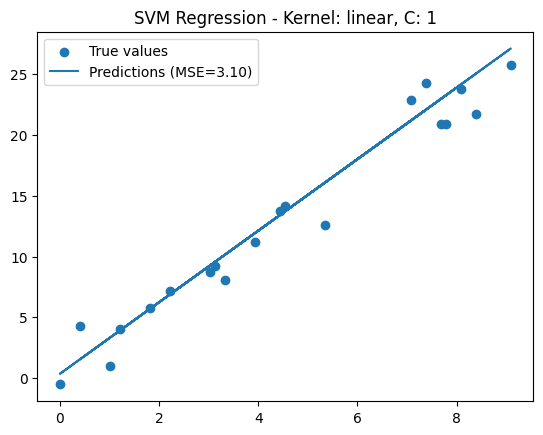

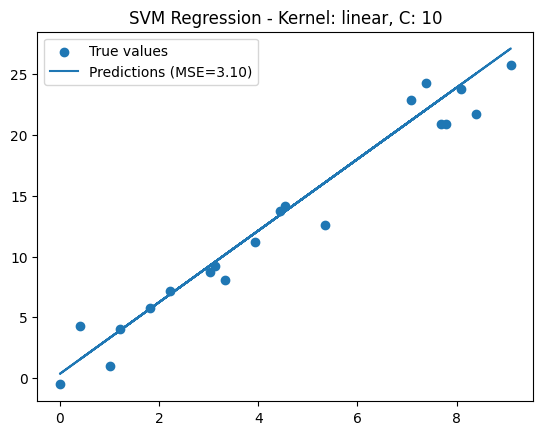

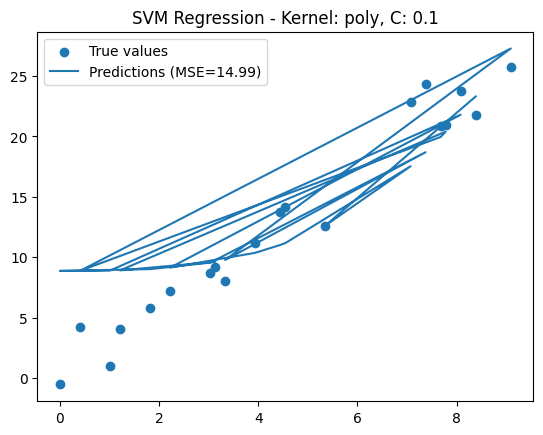

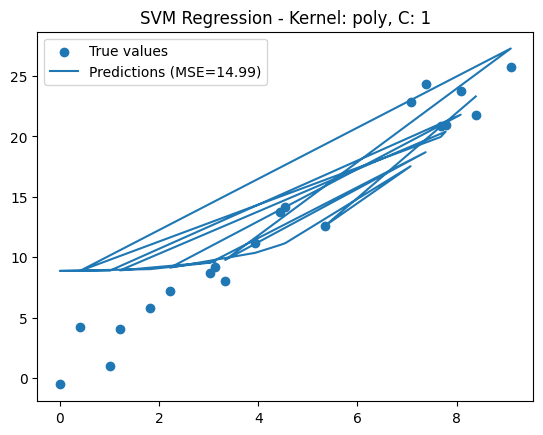

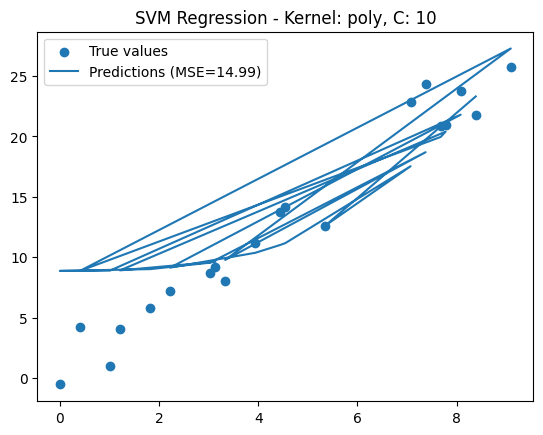

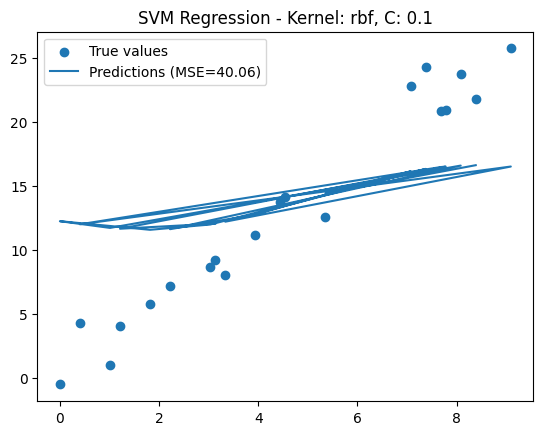

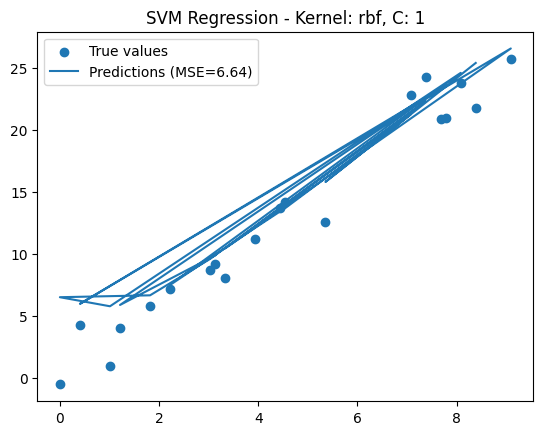

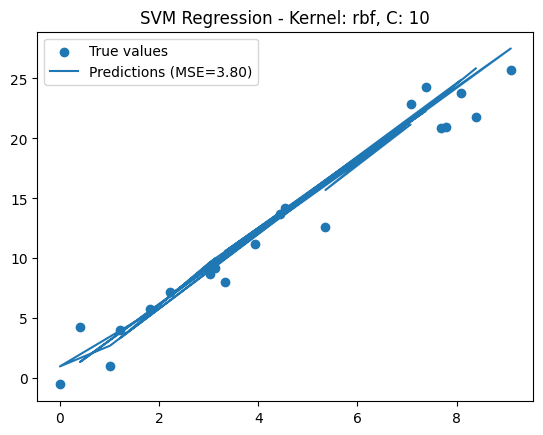

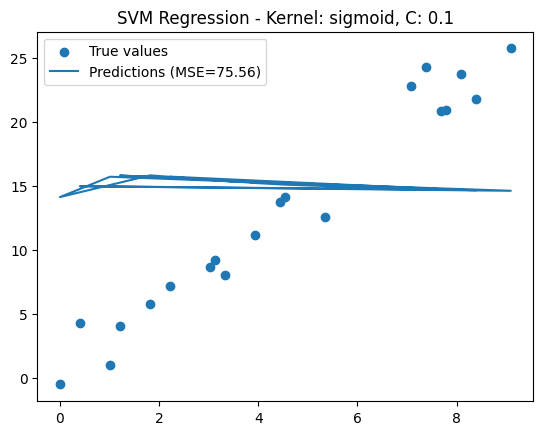

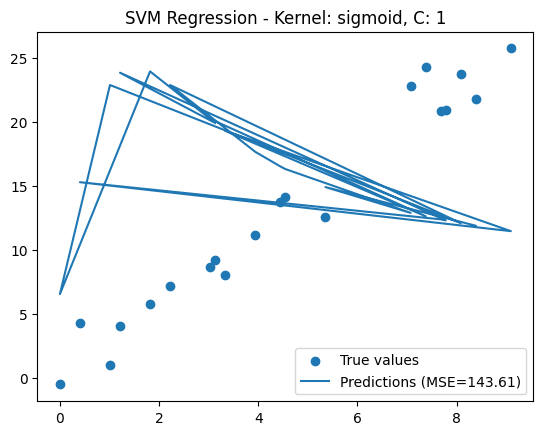

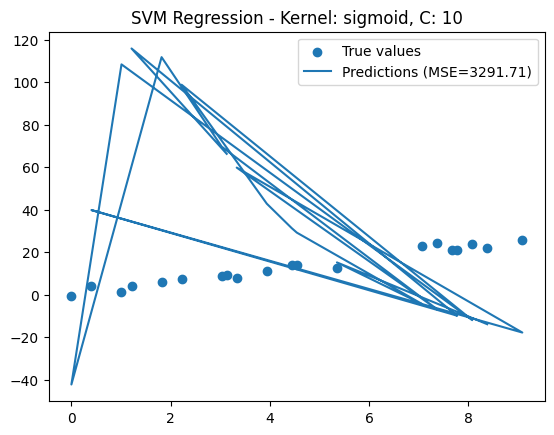

In [6]:
X_regression = np.linspace(0, 10, 100).reshape(-1, 1)
y_regression = 3 * X_regression.squeeze() + np.random.normal(0, 2, size=100)

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)
print(X_test_reg.shape, y_test_reg.shape)
# SVM Regression
kernel_types_reg = ['linear', 'poly', 'rbf', 'sigmoid']
C_values_reg = [0.1, 1, 10]
rows = len(kernel_types_reg)
cols = len(C_values_reg)
for kernel in kernel_types_reg:
    for C in C_values_reg:
        svm_regressor = SVR(kernel=kernel, C=C)
        svm_regressor.fit(X_train_reg, y_train_reg)
        y_pred_reg = svm_regressor.predict(X_test_reg)
        mse = mean_squared_error(y_test_reg, y_pred_reg)
        plt.scatter(X_test_reg, y_test_reg, label='True values')
        plt.plot(X_test_reg, y_pred_reg, label=f'Predictions (MSE={mse:.2f})')
        plt.title(f'SVM Regression - Kernel: {kernel}, C: {C}')
        plt.legend()
        plt.show()


TypeError: Invalid shape (784,) for image data

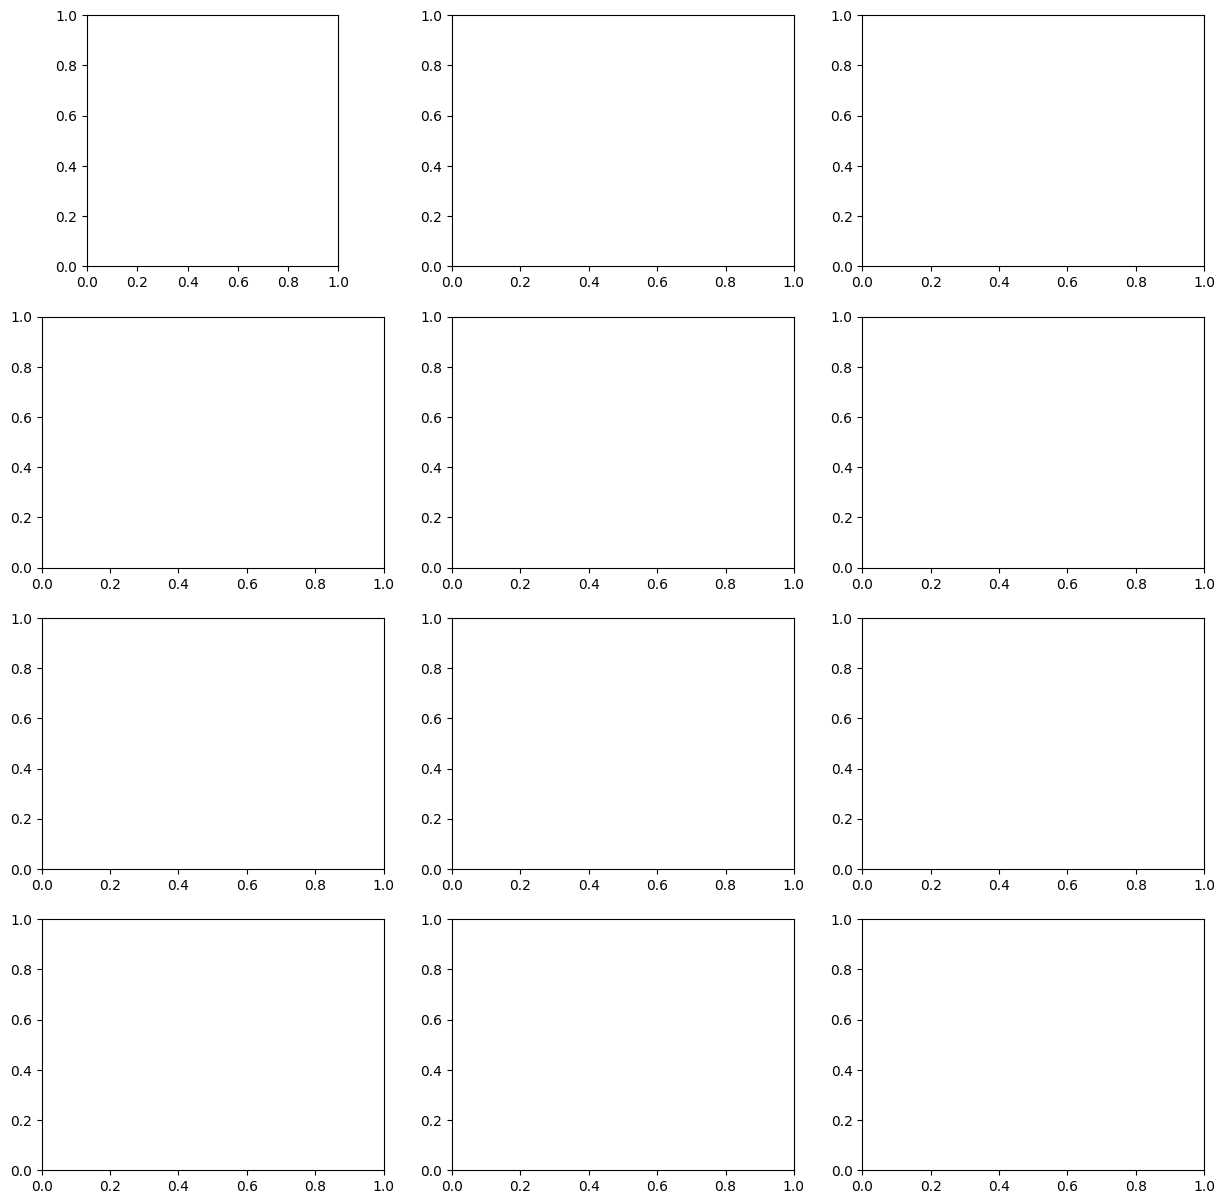

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# SVM Classification
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]

rows = len(kernel_types)
cols = len(C_values)
accs = np.zeros((rows, cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 784))
x_test = scaler.transform(x_test.reshape(-1, 784))


for i, kernel in enumerate(kernel_types):
    for j, C in enumerate(C_values):
        svm_classifier = SVC(kernel=kernel, C=C)
        svm_classifier.fit(x_train, y_train)
        y_pred = svm_classifier.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        accs[i, j] = acc
        axes[i, j].imshow(x_test[0])
        axes[i, j].set_title(f'Kernel: {kernel}, C: {C}, Acc: {acc:.2f}')
        axes[i, j].axis('off')
plt.show()